# Matplotlib Review


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
df = pd.DataFrame(np.random.randint(0,100,100).reshape(20,5),columns= ['A','B','C','D','E'])
# print(df.head())
df.head()

,A,B,C,D,E
0,78,65,37,24,2
1,39,33,40,69,50
2,52,2,27,59,40
3,52,42,39,46,28
4,12,37,46,6,9


In [2]:
# matplotlib有很多样式可以渲染绘图
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
# 选择其中一种样式
plt.style.use('ggplot')

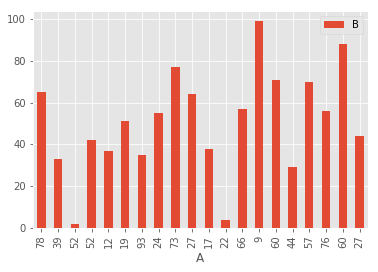

In [4]:
# 用pandas的内置接口绘图
df.plot(kind = 'bar',x = 'A',y = 'B')
plt.show()

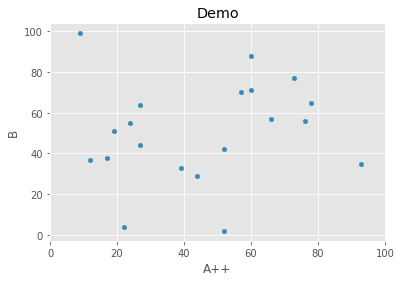

In [9]:
# 面向对象化绘图
fig, ax = plt.subplots()
df.plot(kind = 'scatter',x = 'A', y = 'B',ax =ax)
# ax的设置样式方法需要在plt的接口上加上set
ax.set_title('Demo')
ax.set_xlim([0,100])
ax.set(xlabel = 'A++')
plt.show()

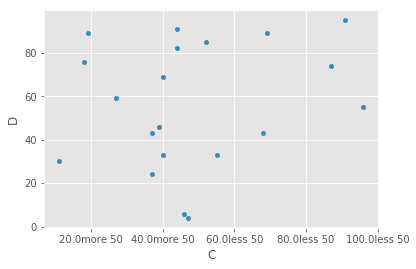

In [15]:
# 格式化坐标轴
def func(x,pos):
    if x>50:
        return '{0}less 50'.format(x)
    else:
        return '{0}more 50'.format(x)
fig, ax = plt.subplots(figsize = (6,4))
formatter = FuncFormatter(func)
ax.xaxis.set_major_formatter(formatter)
df.plot(x = 'C',y = 'D', kind = 'scatter',ax = ax)
plt.show()

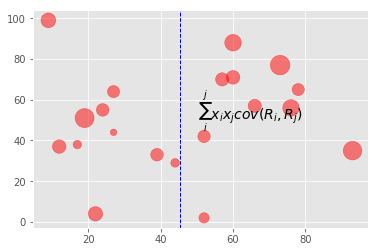

In [27]:
# 绘制线和添加文本
fig ,ax = plt.subplots()
ax.scatter(x = df['A'].values,y = df['B'].values,s = df['C'].values*4,c = 'r',alpha = 0.5)
avg = df['A'].mean()
ax.axvline(x = avg, color = 'b',label = 'Average',linestyle = '--',linewidth = 1)
ax.text(x = avg+5,y =50, s= r'$\sum_{i}^{j}x_ix_jcov(R_i,R_j)$',fontsize = 14)
plt.show()

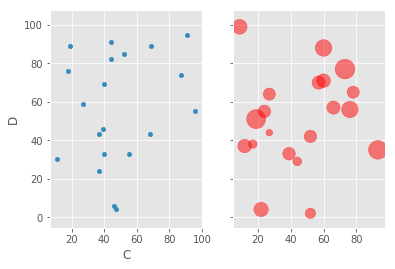

In [31]:
# 多个子图
fig ,(ax0,ax1) = plt.subplots(nrows = 1,ncols =2,sharey = True)
df.plot(x = 'C',y = 'D', kind = 'scatter',ax = ax0)
ax1.scatter(x = df['A'].values,y = df['B'].values,s = df['C'].values*4,c = 'r',alpha = 0.5)
plt.show()

In [32]:
# fig对象
# Matplotlib支持许多不同格式文件的保存。 你可以用fig.canvas.get_supported_filetypes（）查看系统支持的格式：
fig.canvas.filetypes

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [35]:
fig.savefig('test.png',transparent = False,dpi = 80,bbox_inches = 'tight')